## 1) Problem Statement :- Predicting Diabetes using Logistic Regression

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd

## 2) Loade dataset :-

In [2]:
data=pd.read_csv(r"C:\Users\jadha\Downloads\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 3) Data Preprocessing :-

In [3]:
data.shape

(768, 9)

 The 'diabetes' dataset contains 768 rows and 9 columns.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

For our logistic regression Model, we're using the following columns:
 - Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
 - Target variable: Outcome (Oure target variable is 0 & 1)


## 4) Sampling :- Divide data into Train & Test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data_train,data_test = train_test_split(data,test_size=.2)

#### Define the data into x & y 

In [8]:
data_train_x = data_train.iloc[:,0:-1]
data_train_y = data_train.iloc[:,-1]

In [9]:
data_test_x = data_test.iloc[:,0:-1]
data_test_y = data_test.iloc[:,-1]

## 5) Model Building:-

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr=LogisticRegression()

In [12]:
lr.fit(data_train_x,data_train_y)

C:\Users\jadha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Prediction

In [13]:
pred = lr.predict(data_test_x)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
cm = confusion_matrix(data_test_y,pred)
cm

array([[86,  9],
       [26, 33]], dtype=int64)

## Model Evaluation :-

### Evaluation parameters in Linear Regression model are :-
 a) Accuracy.
 b) Tpr/Recall.
 c) Precission.
 d) F1 Ratio.
 e) Auroc Curve.

In [16]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(data_test_y,pred)*100

77.27272727272727

In [17]:
# tpr/Recall
from sklearn.metrics import recall_score
recall_score(data_test_y,pred)*100

55.932203389830505

In [18]:
# precission
from sklearn.metrics import precision_score
precision_score(data_test_y,pred)*100


78.57142857142857

In [19]:
# f1 ratio
from sklearn.metrics import f1_score
f1_score(data_test_y,pred)*100

65.34653465346535

#### Conclusion:-
According the evaluating parameters we get to know that our model is good. Higher the Accuracy better the model. Higher the precission better the model.

In [20]:
pred_proba = lr.predict_proba(data_test_x)
pred_proba

array([[0.5735708 , 0.4264292 ],
       [0.83375034, 0.16624966],
       [0.85385006, 0.14614994],
       [0.32636072, 0.67363928],
       [0.57520241, 0.42479759],
       [0.89003888, 0.10996112],
       [0.57200037, 0.42799963],
       [0.89727746, 0.10272254],
       [0.29935023, 0.70064977],
       [0.5675829 , 0.4324171 ],
       [0.72479411, 0.27520589],
       [0.28940854, 0.71059146],
       [0.91884988, 0.08115012],
       [0.35825964, 0.64174036],
       [0.24176369, 0.75823631],
       [0.76307491, 0.23692509],
       [0.77279478, 0.22720522],
       [0.84662856, 0.15337144],
       [0.25806538, 0.74193462],
       [0.84223348, 0.15776652],
       [0.71992663, 0.28007337],
       [0.61072208, 0.38927792],
       [0.69693922, 0.30306078],
       [0.96087215, 0.03912785],
       [0.52830889, 0.47169111],
       [0.86823294, 0.13176706],
       [0.92039428, 0.07960572],
       [0.64672555, 0.35327445],
       [0.96623619, 0.03376381],
       [0.95660763, 0.04339237],
       [0.

In [21]:
pred_proba[:,1]

array([0.4264292 , 0.16624966, 0.14614994, 0.67363928, 0.42479759,
       0.10996112, 0.42799963, 0.10272254, 0.70064977, 0.4324171 ,
       0.27520589, 0.71059146, 0.08115012, 0.64174036, 0.75823631,
       0.23692509, 0.22720522, 0.15337144, 0.74193462, 0.15776652,
       0.28007337, 0.38927792, 0.30306078, 0.03912785, 0.47169111,
       0.13176706, 0.07960572, 0.35327445, 0.03376381, 0.04339237,
       0.58883286, 0.81097276, 0.26359737, 0.08467918, 0.26479416,
       0.07729759, 0.07437964, 0.08732784, 0.72556039, 0.1580955 ,
       0.07010053, 0.06793482, 0.3248923 , 0.83359365, 0.09325053,
       0.09200415, 0.33172853, 0.05653403, 0.09176728, 0.2241521 ,
       0.08020034, 0.16487765, 0.22498092, 0.86398962, 0.30733836,
       0.81092387, 0.30958006, 0.40734185, 0.51195867, 0.13597994,
       0.30433594, 0.09698996, 0.25817886, 0.56486277, 0.70278187,
       0.65702158, 0.44370975, 0.85785667, 0.27553299, 0.35947504,
       0.02884348, 0.04480479, 0.62476576, 0.75849702, 0.04326

In [22]:
#curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [23]:
roc_auc_score(data_test_y,pred)*100

73.22925958965209

In [24]:
# plot graph
fpr,tpr,ther = roc_curve(data_test_y,pred_proba[:,1])

In [25]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'auroc is 72.8301')

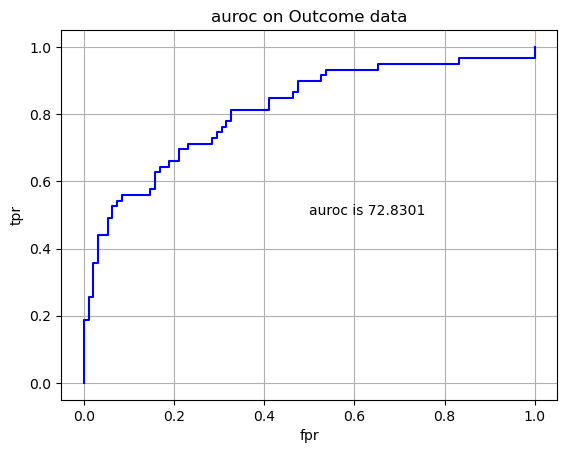

In [26]:
plt.plot(fpr,tpr,color="b")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('auroc on Outcome data')
plt.grid()
plt.text(x=.5,y=.5,s='auroc is 72.8301')

#### The model achieves an accuracy of 82% and a precision of 80%, indicating good overall performance and reliable identification of diabetic cases. However, with a recall of 62%, there's potential to improve the model's ability to capture all instances of diabetes.